# Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

# Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* Determine the optimal value of lambda for ridge and lasso regression.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

## Step 1: Data understanding and exploration

In [1]:
#importing required packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##  Step 2: Data Cleaning :-  Missing Value, Duplicates, Imputing, Dropping, Deleting, Exploration

In [6]:
# check for null values in all categorical columns

df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

#### Alley
* This indicates the type of alley access to propery.
* We notice that only 91 properties out of 1460 properties have Alley access. Hence this feature can not offer any value addition. So dropping the same would be a wise idea.

In [8]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [9]:
df=df.drop('Alley',axis=1)

#### PoolQC
* This column indicates the quality of pool the property has.
* Here we notice that majority of the properties does not have pool,So we can drop it.

In [10]:
df.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

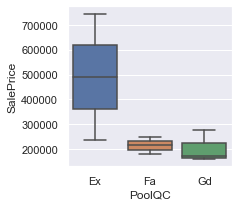

In [11]:
#Plotting the categorical variables related to PooQC to find which ones have correlation and can be dropped
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = df)

In [12]:
df=df.drop('PoolQC',axis=1)

#### MiscFeature
* This column indicates miscellaneous feature that the properties has and which are not covered in other categories
* Most of properties does not have any such miscellaneous feature. So let’s drop it.


In [13]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

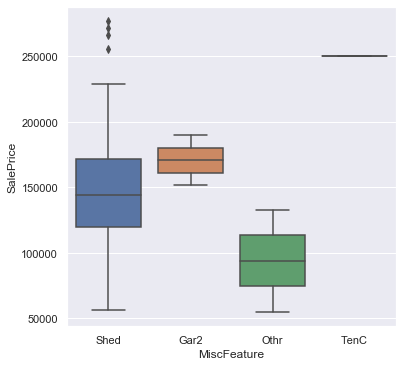

In [14]:
#Plotting the categorical variables related to MiscFeature to find which ones have correlation and can be dropped
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = df)

In [15]:
df=df.drop('MiscFeature',axis=1)

#### Fence
* This column shows different type/quality of fence the housing properties have.
* only 281 properties have certain type of fence while the rest does not have any. So lets drop this column.

In [16]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [17]:
df=df.drop('Fence',axis=1)

#### FireplaceQu
* This feature indicates the fireplace quality the differnet houses have.

In [18]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

* Here 770 properties out of total 1460 have any type of fire place while the rest does not have any. Since the count is significant, we can not merely drop this column as the same might be an insightful feature for out model. We should convert NA to not_available for better data manipulation.

In [19]:
df['FireplaceQu'].replace(np.nan,'not_available',inplace=True)
df.FireplaceQu.value_counts()

not_available    690
Gd               380
TA               313
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

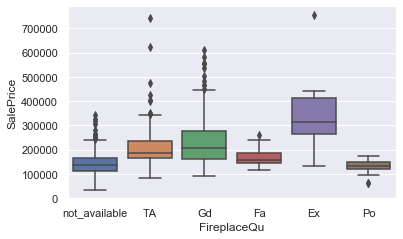

In [20]:
#Plotting the categorical variables related to FireplaceQu and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = df)
#Clearly Fireplace presence drives Sale price to some extent

#### LotFrontage
* This column conveys the linear feet of street connected to property
* We know that is has 259 NA values.
* This column is of float type. Let’s checkout the corresponding data distribution.

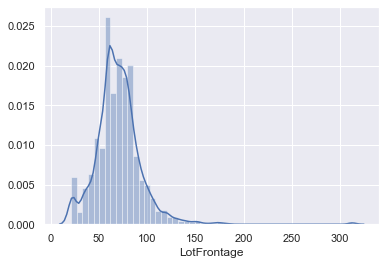

In [21]:
sns.distplot(df.LotFrontage)
plt.show()

* From the above plot, we may notice that there are quote a low outliers and hence the distribution of the data is right-skewed.
* Now since the data distribution is skewed, let’s replace NA values with median value of this column.

In [22]:
df.LotFrontage.replace(np.nan,df.LotFrontage.median(),inplace=True)
df.LotFrontage.isnull().sum()

0

#### garage_cols
* There are total 06 Garage related columns which conveys information as under:
* GarageYrBlt: Year garage was built
* GarageCond: Garage condition
* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageQual: Garage quality

In [23]:
garage_cols=['GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual']

In [24]:
for i in garage_cols:
    print(i)
    print(df[i].isnull().sum())
    print()

GarageYrBlt
81

GarageCond
81

GarageType
81

GarageFinish
81

GarageCars
0

GarageQual
81



In [25]:
df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

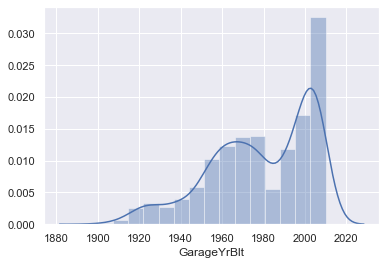

In [26]:
#check the data distribution of 'GarageYrBlt' column
sns.distplot(df.GarageYrBlt)
plt.show()

 imputation with mean or median (column being numeric) does not seem a viable option here as the data distribution of this column is not normal.

* Let’s get following driven metric out of GarageYrBlt column:
* 0: NA
* 1: GarageYrBlt<2000 (Old Garage)
* 2: GarageYrBlt>=2000 (New Garage)

In [27]:
#function to get the derived metric
def func(x):
    if x<2000:
        return 1
    if x>=2000:
        return 2
    if str(x)=='nan':
        return 0
df['GarageYrBlt']=df.GarageYrBlt.apply(func)

In [28]:
df.GarageYrBlt.value_counts()

1    977
2    402
0     81
Name: GarageYrBlt, dtype: int64

In [29]:
print(df.GarageCond.value_counts())
print("******************************************")
print(df.GarageType.value_counts())
print("******************************************")
print(df.GarageFinish.value_counts())
print("******************************************")
print(df.GarageQual.value_counts())

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
******************************************
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
******************************************
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
******************************************
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


In [30]:
df.GarageCond.replace(np.nan,'No_Garage',inplace=True)
df.GarageType.replace(np.nan,'No_Garage',inplace=True)
df.GarageFinish.replace(np.nan,'No_Garage',inplace=True)
df.GarageQual.replace(np.nan,'No_Garage',inplace=True)

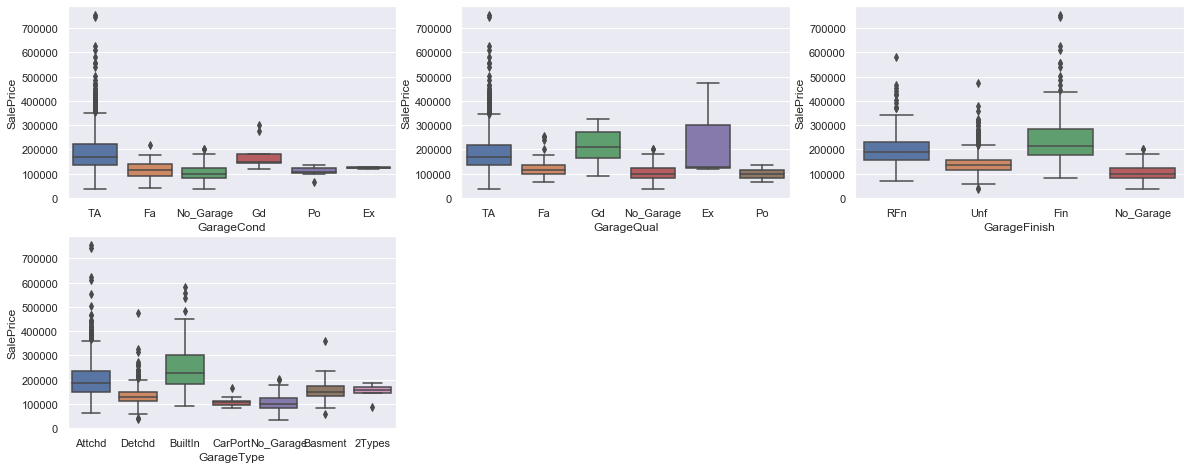

In [31]:
#Plotting the categorical variables related to Garage and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df)

#### BsmtFinType2
* This column conveys the rating of basement finished area, if they are of multiple types.

In [32]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [33]:
df.BsmtFinType2.replace(np.nan,'No_Basement',inplace=True)

#### BsmtExposure
* This column refers to walkout or garden level walls.

In [34]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
df.BsmtExposure.replace(np.nan,'No_Basement',inplace=True)

#### BsmtFinType1
* This column conveys rating of basement finished area.

In [36]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [37]:
df.BsmtFinType1.replace(np.nan,'No_Basement',inplace=True)

#### BsmtCond
* This column evaluates the general condition of the basement.

In [38]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [39]:
df.BsmtCond.replace(np.nan,'No_Basement',inplace=True)

#### BsmtQual
* This columns evaluates the height of the basement.

In [40]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [41]:
df.BsmtQual.replace(np.nan,'No_Basement',inplace=True)

In [42]:
#Taking a deep dive into the Basement related attributes to understand the correlations
House_Basement=df[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtCond']]
House_Basement.head()
House_Basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1460 non-null   object
 1   BsmtExposure  1460 non-null   object
 2   BsmtFinType1  1460 non-null   object
 3   BsmtFinType2  1460 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinSF2    1460 non-null   int64 
 6   BsmtUnfSF     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   BsmtCond      1460 non-null   object
dtypes: int64(4), object(5)
memory usage: 102.8+ KB


<Figure size 1440x720 with 0 Axes>

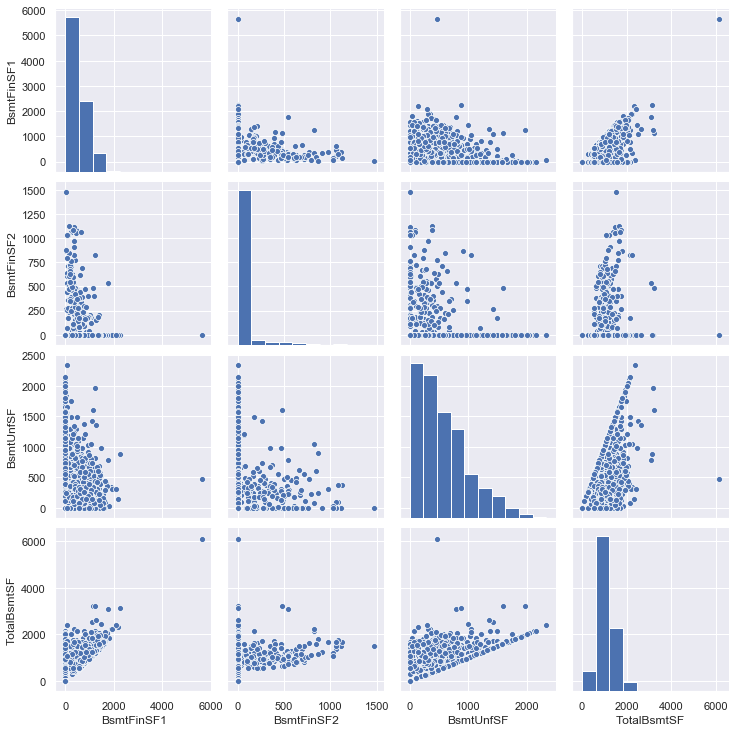

In [43]:
# pairwise scatter plot to explore Basement attributes

plt.figure(figsize=(20, 10))
sns.pairplot(House_Basement)
plt.show()

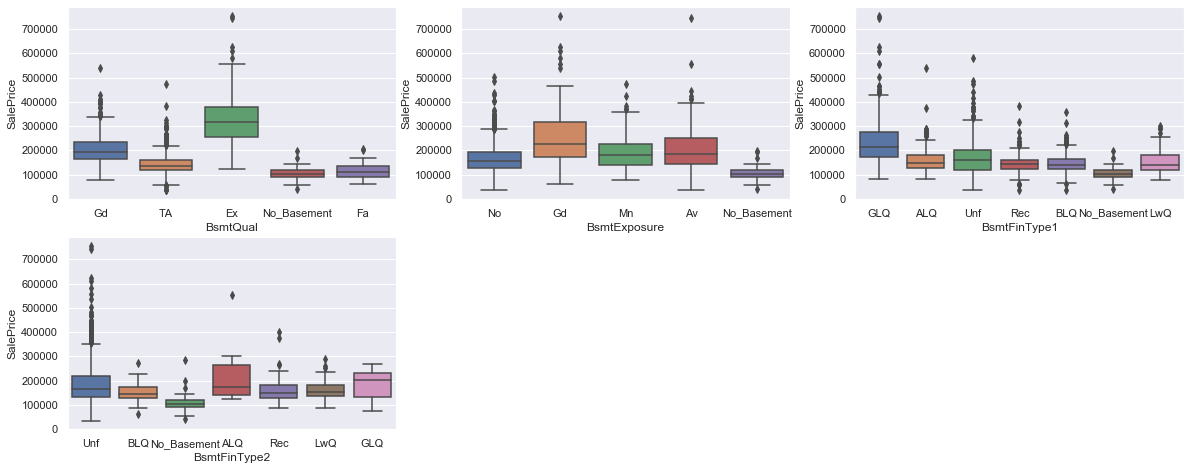

In [44]:
#Plotting the categorical variables related to Basement to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = df)

#### Basement data anomaly alert:
From the above basement related columns, we notice that columns BsmtFinType2 and BsmtExposure conveys 38 properties does not have basement while columns BsmtFinType1, BsmtCond, BsmtQual states that 37 properties does not have basement. So certainly one or two housing property has anomalous data. Let’s figure it out.

In [46]:
df[(df.BsmtFinType2=='No_Basement') & (df.BsmtExposure=='No_Basement')].shape

(37, 77)

In [47]:
df[(df.BsmtFinType2=='No_Basement')].shape

(38, 77)

In [48]:
df[(df.BsmtExposure=='No_Basement')].shape

(38, 77)

In [49]:
df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')].shape

(37, 77)

In [50]:
dd1=df[(df.BsmtFinType2=='No_Basement')]
dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]
dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333.0,20.0,RL,85.0,10655.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,WD,Normal,284000.0


In [51]:
dd1=df[(df.BsmtExposure=='No_Basement')]
dd2=df[(df.BsmtFinType1=='No_Basement') & (df.BsmtCond=='No_Basement') & (df.BsmtQual=='No_Basement')]
dd1[~dd1.isin(dd2)].dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949.0,60.0,RL,65.0,14006.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Normal,192500.0


In [52]:
df=df[(df.Id!=333.0) & (df.Id!=949.0)]

#### MasVnrType
* This column conveys masonry veneer type

In [57]:
df.MasVnrType.value_counts()

None       872
BrkFace    443
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [58]:
df.MasVnrType.replace(np.nan,'None',inplace=True)

#### Electrical
* This column conveys the type of Electrical system that the properties have

In [59]:
df.Electrical.value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [60]:
df.Electrical.replace(np.nan,df.Electrical.mode()[0],inplace=True)

#### MasVnrArea
* This column says masonry veneer area in square feet

In [61]:
df.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
259.0      1
621.0      1
Name: MasVnrArea, Length: 326, dtype: int64

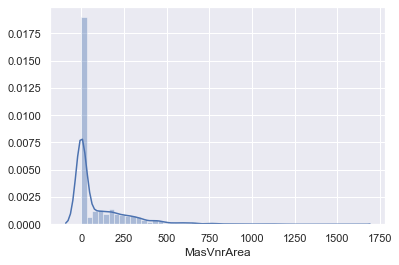

In [62]:
#check distribution plot
sns.distplot(df.MasVnrArea)
plt.show()

* We can replace ‘na’ by median value, as distribution seems skewed.

In [63]:
df.MasVnrArea.replace(np.nan,df.MasVnrArea.median(),inplace=True)

In [64]:
#all the numeric columns in df
df.select_dtypes(['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [65]:
df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      58
2      51
Name: MoSold, dtype: int64

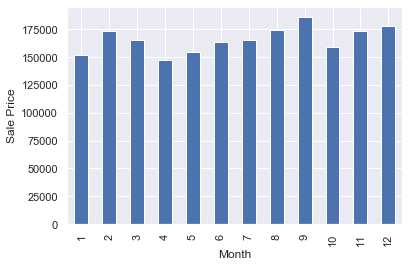

In [66]:
#check for the monthly sale price pattern
df.groupby('MoSold').SalePrice.median().plot.bar()
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show()

Month-sold column has been considered as numeric type. Here, we do not see any monthly price pattern. Hence it seems of no use to include it as our model predictor. So we can drop it.

In [67]:
df.drop('MoSold',axis=1,inplace=True)

#### YearBuilt, YrSold & YearRemodAdd
Here,
* YearBuilt column indicates the year of construction of the property
* YrSold indicates the year of selling of that particular property.
* YearRemodAdd is remodel date or same as construction date if no remodeling or additions

 YearBuilt should be less than YrSold, YearBuilt should be less than YearRemodAdd & YearRemodAdd should be less than YrSold

In [68]:
(df.YearBuilt>df.YrSold).sum()

0

In [69]:
(df.YearRemodAdd<df.YearBuilt).sum()

0

In [70]:
(df.YearRemodAdd>df.YrSold).sum()

1

Here for one data point, we have YearRemodAdd more than YrSold, which seems irrational as all the properties have been sold after construction and/or remodelling. This is a data anomaly. So let’s drop this column.

In [71]:
print(df[df.YearRemodAdd>df.YrSold].YearRemodAdd)
print(df[df.YearRemodAdd>df.YrSold].YrSold)

523    2008
Name: YearRemodAdd, dtype: int64
523    2007
Name: YrSold, dtype: int64


In [72]:
#drop the anamalous row
df=df[df.YearRemodAdd<=df.YrSold]

In [73]:
df['house_age1']=df.YrSold-df.YearBuilt
df.house_age1.describe()

count    1457.000000
mean       36.616335
std        30.243455
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: house_age1, dtype: float64

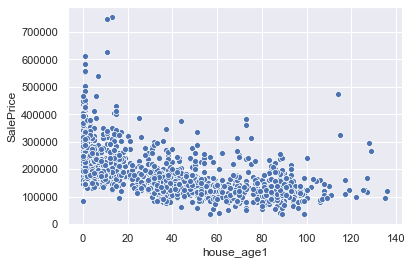

In [74]:
sns.scatterplot(x=df.house_age1,y=df.SalePrice)
plt.show()

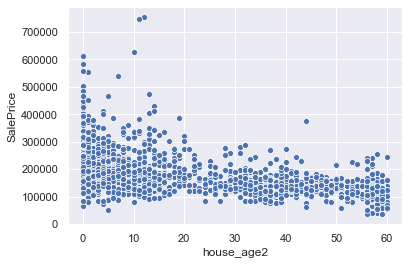

In [75]:
df['house_age2']=df.YrSold-df.YearRemodAdd
sns.scatterplot(df.house_age2,df.SalePrice)
plt.show()

In [76]:
df.drop(['YearBuilt', 'YearRemodAdd','house_age1','YrSold'], axis=1,inplace=True)

In [77]:
#check for columns with more that 85% same values
cols=df.select_dtypes(['int64','float64','object']).columns
skewed_cols={}
for col in cols:
    if max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.85:
        skewed_cols[col]=round(max(list(df[col].value_counts(normalize=True).sort_values(ascending=False).head(1))),2)
pd.DataFrame({'Features':list(skewed_cols.keys()),'Percentage':list(skewed_cols.values())})

,Features,Percentage
0,Street,1.00
1,LandContour,0.90
2,Utilities,1.00
3,LandSlope,0.95
4,Condition1,0.86
5,Condition2,0.99
6,RoofMatl,0.98
7,ExterCond,0.88
8,BsmtCond,0.90
9,BsmtFinType2,0.86


In [78]:
df.drop(list(skewed_cols.keys()),axis=1,inplace=True)

In [79]:
numeric_cols=df.select_dtypes(['int64','float64']).columns
outliers_per_dict={}
for i in numeric_cols:
    IQR=df[i].quantile(.75)-df[i].quantile(.25)
    outliers_count=df[(df[i]>(df[i].quantile(.75)+1.5*IQR)) | (df[i]<(df[i].quantile(.25)-1.5*IQR))].shape[0]
    total=df.shape[0]
    outliers_per=round(outliers_count/total*100,2)
    outliers_per_dict[i]=outliers_per
outlier_df=pd.DataFrame({'Features':list(outliers_per_dict.keys()),'Percentage':list(outliers_per_dict.values())})
outlier_df

,Features,Percentage
0,Id,0.00
1,MSSubClass,7.07
2,LotFrontage,7.21
3,LotArea,4.60
4,OverallQual,0.14
5,OverallCond,8.58
6,MasVnrArea,6.66
7,BsmtFinSF1,0.41
8,BsmtUnfSF,1.99
9,TotalBsmtSF,4.05


In [80]:
df2=df
for i in numeric_cols:
    IQR=df2[i].quantile(.75)-df2[i].quantile(.25)
    df2=df2[(df2[i]<(df2[i].quantile(.75)+1.5*IQR)) & (df2[i]>(df2[i].quantile(.25)-1.5*IQR))]
df2.shape[0]/df.shape[0]*100

58.40768702814001

In [ ]:
#Taking a deep dive into the Basement related attributes to understand the correlations
HouseAu_Porch=df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]

# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(HouseAu_Porch)
plt.show()

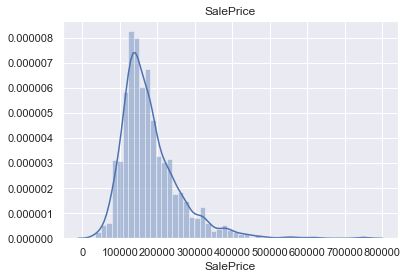

In [82]:
# Visualise the target variable -> SalePrice
#sns.distplot(df.SalePrice)
sns.distplot(df['SalePrice'])
plt.title('SalePrice')
plt.show()

Text(0.5, 1.0, 'With log transformation')

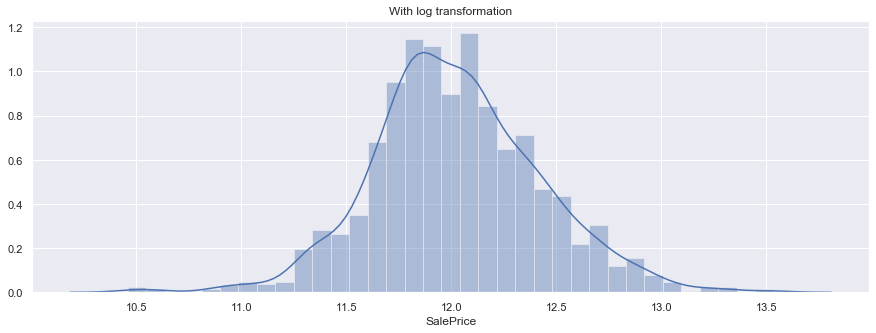

In [83]:
#plotting distribution of 'log(SalePrice)' 
plt.figure(figsize=(15,5))
sns.distplot(np.log(df['SalePrice']))
plt.title('With log transformation')

In [84]:
df['SalePrice']=np.log(df['SalePrice'])

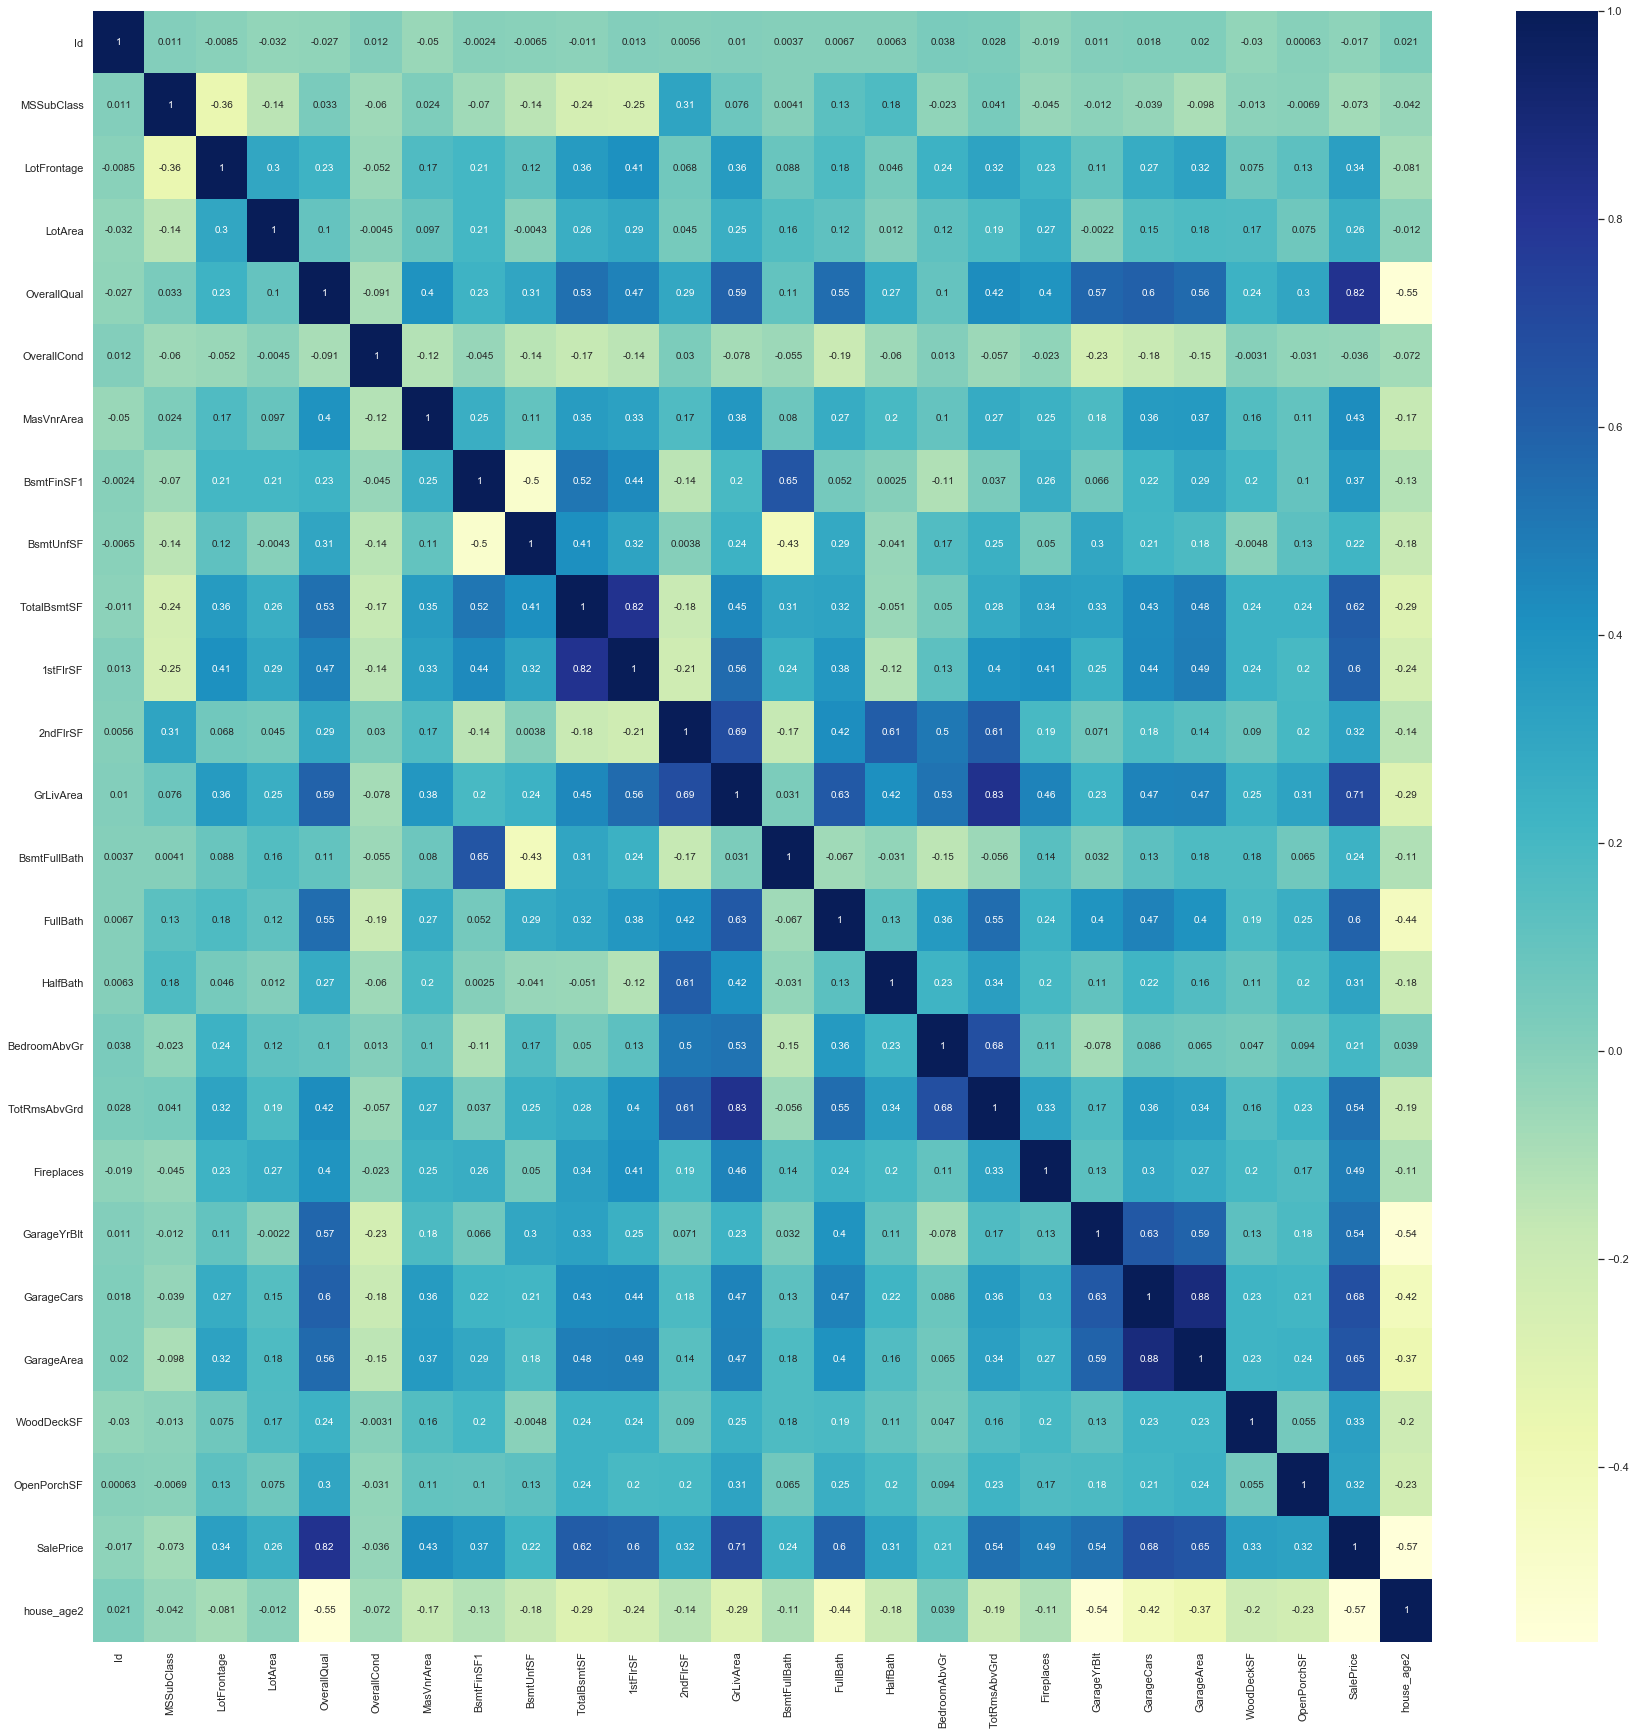

In [85]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

Here, we find following highly correlated independent variables:
* TotalBsmtSF & 1stFlrSF have 82% correlation
* TotRmsAbvGrd & GrLivArea have 83% correlation
* GarageCars & GarageArea have 88% correlation

In [86]:
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'], axis=1,inplace=True)

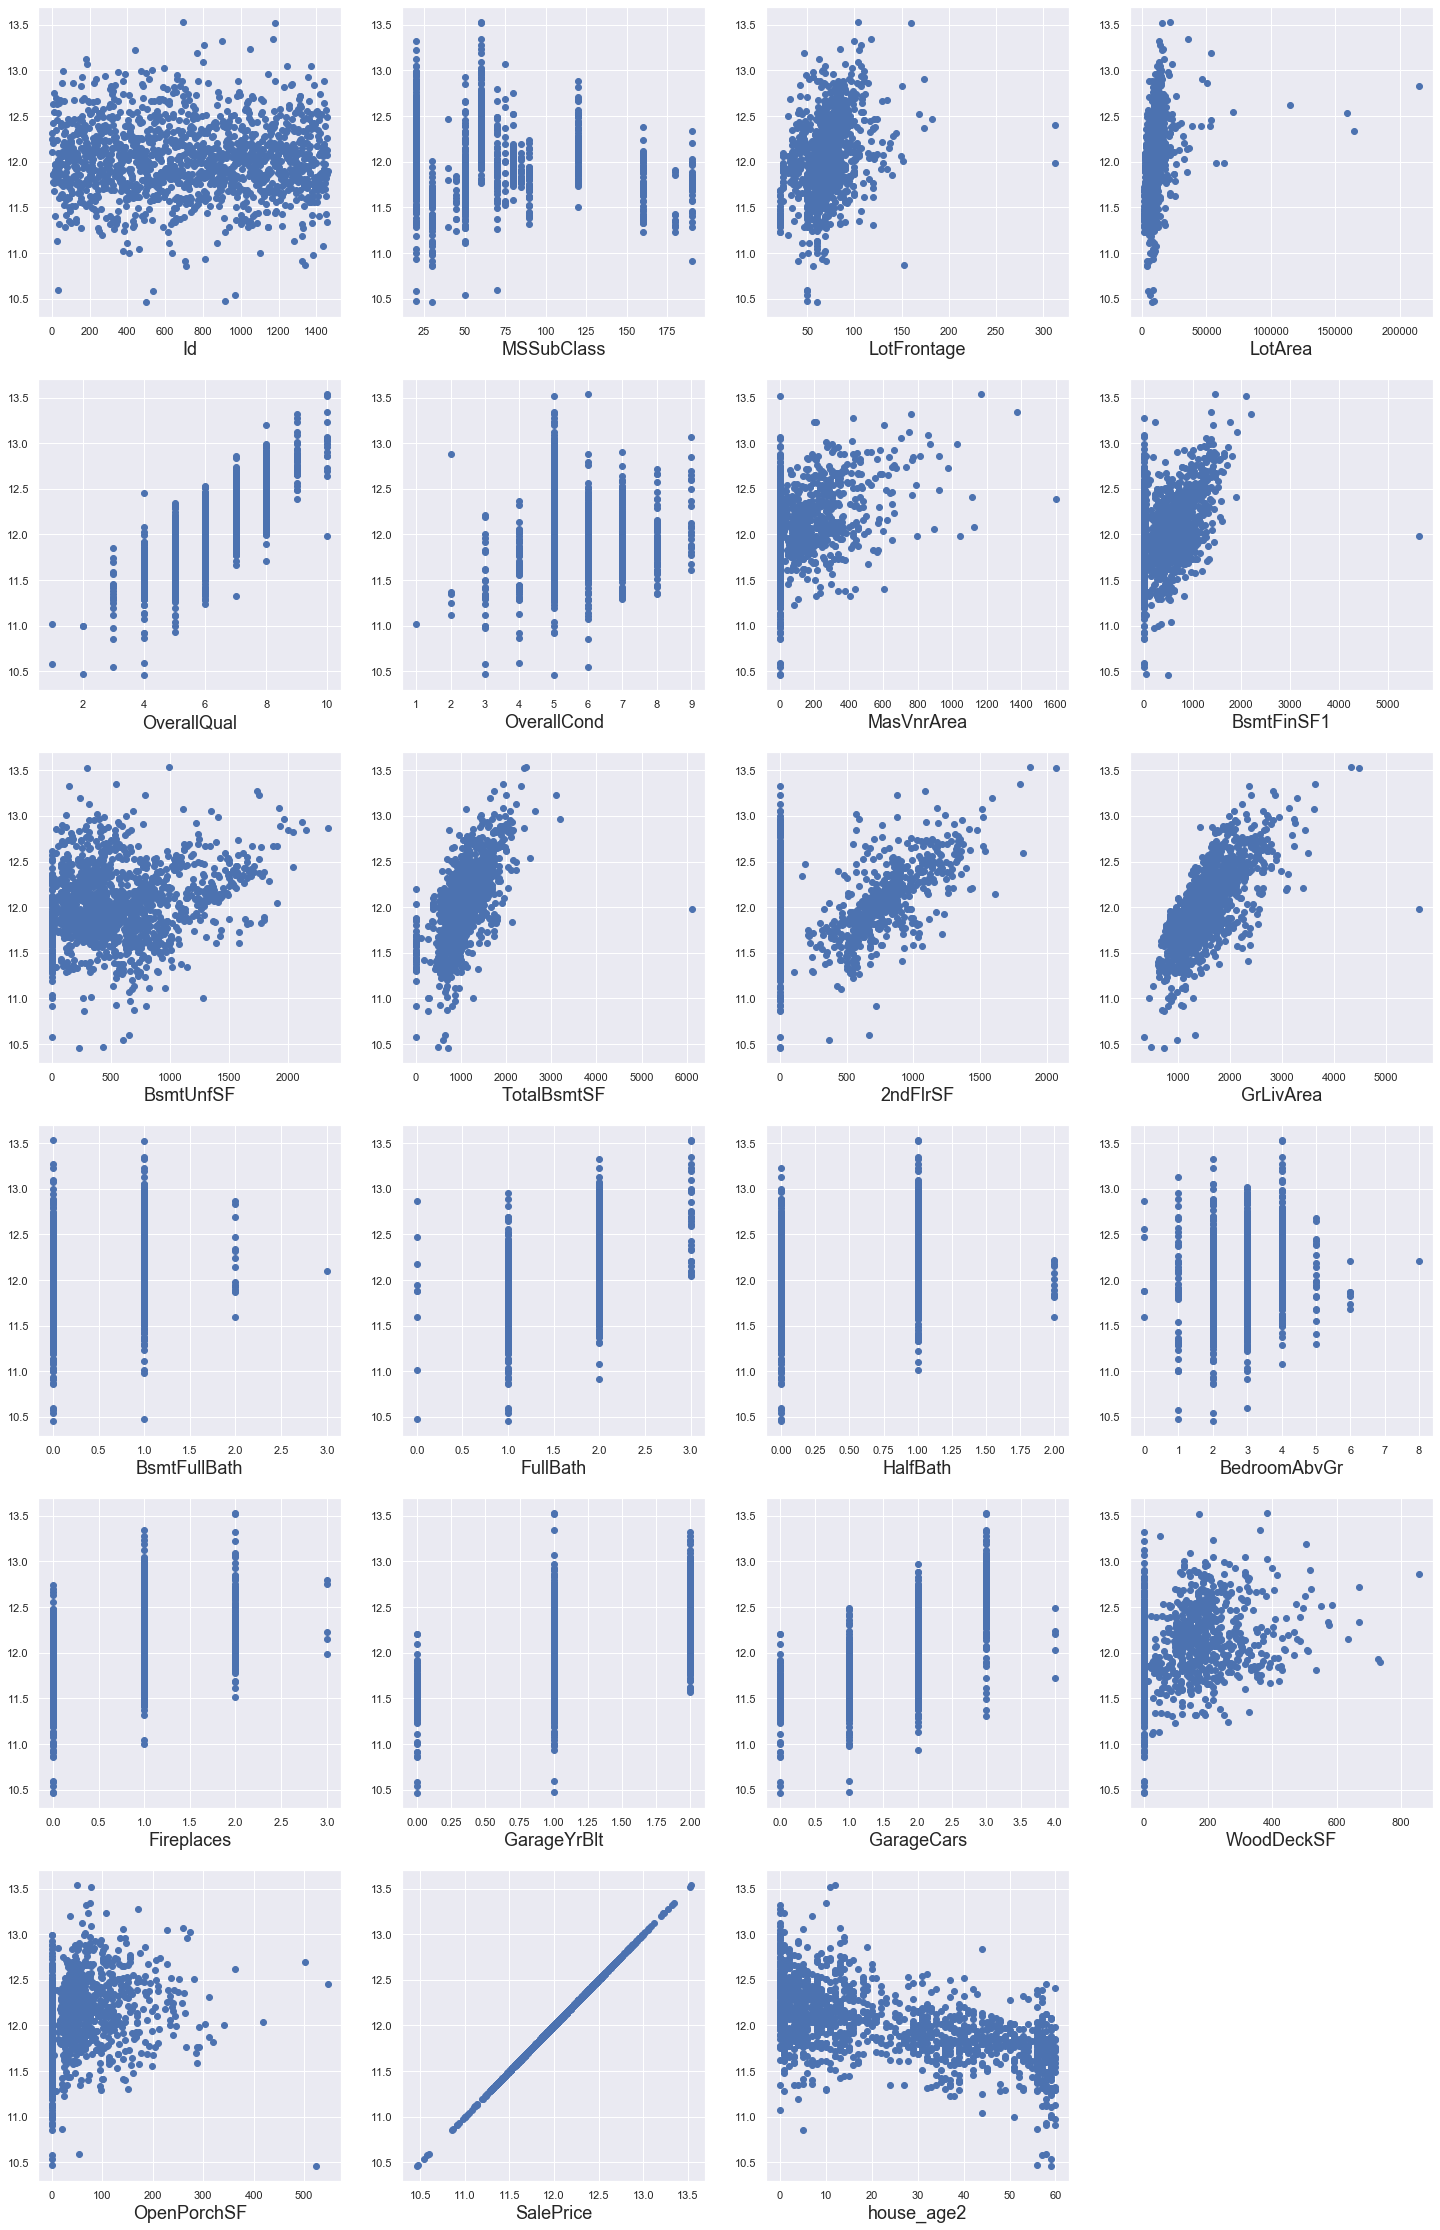

In [87]:
num_col=list(df.select_dtypes(['int64','float64']))
plt.figure(figsize=(25,40))
for m,n in enumerate(num_col):
    plt.subplot(6,4,(m+1))
    plt.scatter(df[n],df['SalePrice'])
    plt.xlabel(n,fontsize=18)
plt.show()

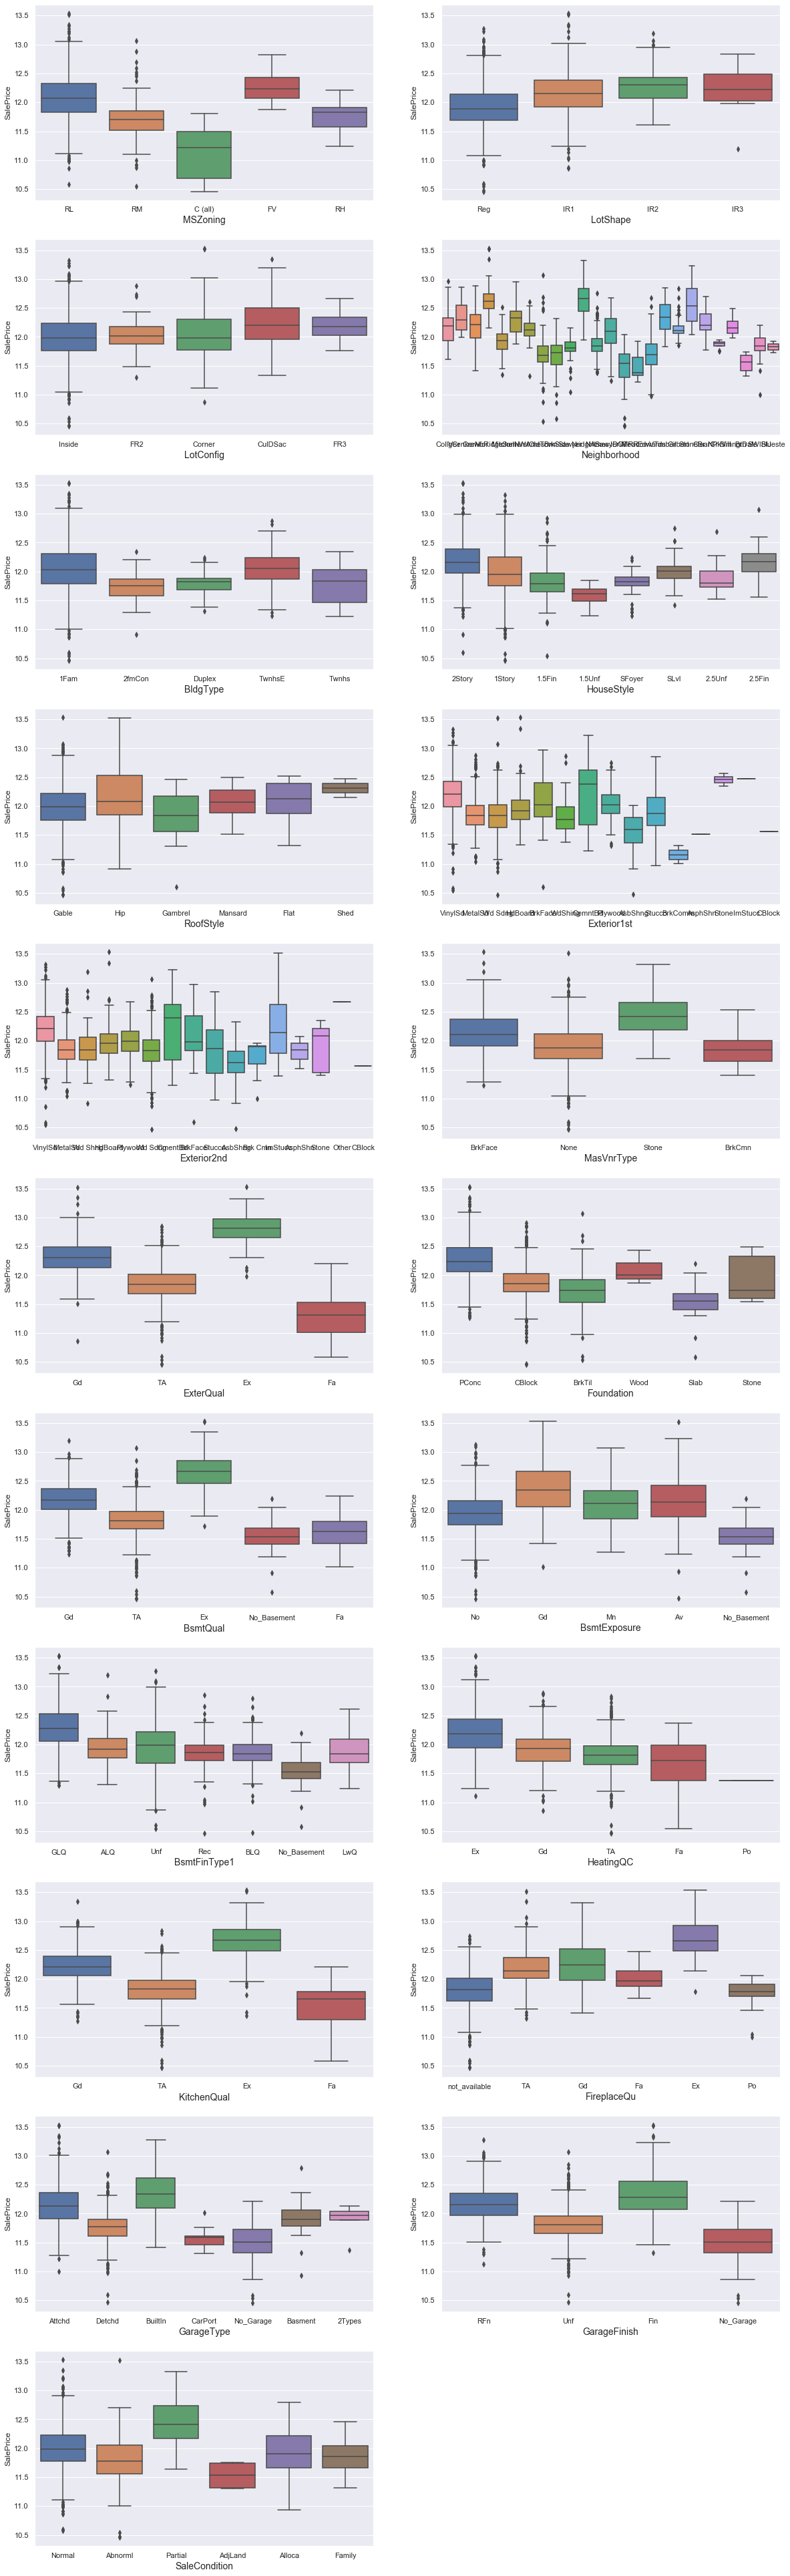

In [88]:
cat_col=list(df.select_dtypes('object'))
plt.figure(figsize=(20,70))
for m,n in enumerate(cat_col):
    plt.subplot(11,2,(m+1))
    sns.boxplot(x=n, y='SalePrice',data=df)
    plt.xlabel(n, fontsize=14)
plt.show()

In [89]:
#check for 'object' type columns
cat_columns=df.select_dtypes('object').columns
cat_columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'SaleCondition'],
      dtype='object')

#### LotShape
It gives general shape of property

In [90]:
df.LotShape.value_counts()

Reg    925
IR1    481
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [91]:
#giving different weightage by mapping based on the data dictionaty
df['LotShape']=df['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

#### ExterQual
This column evaluates the quality of the material on the exterior.

In [92]:
df.ExterQual.value_counts()

TA    906
Gd    486
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [93]:
#giving different weightage by mapping based on the data dictionaty
df['ExterQual']=df['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### BsmtQual
This column evaluates the height of the basement.

In [94]:
df.BsmtQual.value_counts()

TA             649
Gd             616
Ex             120
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [95]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtQual']=df['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No_Basement':0})

#### BsmtExposure
This column refers to walkout or garden level walls

In [96]:
df.BsmtExposure.value_counts()

No             952
Av             221
Gd             133
Mn             114
No_Basement     37
Name: BsmtExposure, dtype: int64

In [97]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtExposure']=df['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No_Basement':0})

#### BsmtFinType1
This column gives rating of basement finished area

In [98]:
df.BsmtFinType1.value_counts()

Unf            429
GLQ            416
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64

In [99]:
#giving different weightage by mapping based on the data dictionaty
df['BsmtFinType1']=df['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No_Basement':0})

#### HeatingQC
This column conveys about Heating quality and condition.

In [101]:
df.HeatingQC.value_counts()

Ex    738
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [102]:
#giving different weightage by mapping based on the data dictionaty
df['HeatingQC']=df['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### KitchenQual
This quality tells about Kitchen quality.

In [103]:
df.KitchenQual.value_counts()

TA    735
Gd    584
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [104]:
#giving different weightage by mapping based on the data dictionaty
df['KitchenQual']=df['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#### FireplaceQu
This column conveys about Fireplace quality.

In [105]:
df.FireplaceQu.value_counts()

not_available    690
Gd               378
TA               312
Fa                33
Ex                24
Po                20
Name: FireplaceQu, dtype: int64

In [106]:
#giving different weightage by mapping based on the data dictionaty
df['FireplaceQu']=df['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'not_available':0})

#### GarageFinish
This column is about Interior finish of the garage.

In [107]:
df.GarageFinish.value_counts()

Unf          605
RFn          420
Fin          351
No_Garage     81
Name: GarageFinish, dtype: int64

In [108]:
#giving different weightage by mapping based on the data dictionaty
df['GarageFinish']=df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No_Garage':0})

In [109]:
#get 'object' datatype
unordered_columns=df.select_dtypes('object').columns

In [110]:
#get dummies of object dtype columns and joining the same with main df
for i in unordered_columns:
    dum_df=pd.get_dummies(df[i],prefix=i,drop_first=True)   #enabling drop_first
    df=pd.concat([df,dum_df],axis=1)
    df.drop(i,axis=1,inplace=True)   #dropping used object dtype column

In [111]:
df.drop('Id',axis=1,inplace=True)

In [112]:
#check info of finally prepared dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 127 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(28), uint8(96)
memory usage: 540.8 KB


In [113]:
df_train, df_test= train_test_split(df,train_size=0.7,random_state=42)

In [114]:
scaler=MinMaxScaler()
df_train_transformed=scaler.fit_transform(df_train)
#convert the scalled data array into dataframe
df_train_transformed=pd.DataFrame(df_train_transformed, columns=df_train.columns)
df_test_transformed=scaler.transform(df_test)
#convert the scalled data array into dataframe
df_test_transformed=pd.DataFrame(df_test_transformed, columns=df_test.columns)

In [115]:
y_train=df_train_transformed['SalePrice']
X_train=df_train_transformed.drop('SalePrice',axis=1)
y_test=df_test_transformed['SalePrice']
X_test=df_test_transformed.drop('SalePrice',axis=1)

In [116]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)
print('train R2 score is',(r2_score(y_train,y_train_pred)))
print('test R2 score is',(r2_score(y_test,y_test_pred)))

train R2 score is 0.9131880089575874
test R2 score is 0.8899859708350445


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# function that creates a dataframe that will contain the names of all the feature variables and their respective VIFs
def get_VIF_table(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
get_VIF_table(X_train)

,Features,VIF
81,Exterior1st_CBlock,inf
95,Exterior2nd_CBlock,inf
115,GarageType_Attchd,250.15
32,MSZoning_RL,208.84
89,Exterior1st_VinylSd,170.96
...,...,...
123,SaleCondition_Family,1.37
113,Foundation_Stone,1.22
38,Neighborhood_Blueste,1.18
114,Foundation_Wood,1.16


In [118]:
X_train=X_train.drop('Exterior2nd_CBlock',axis=1)
X_test=X_test.drop('Exterior2nd_CBlock',axis=1)
get_VIF_table(X_train)

,Features,VIF
114,GarageType_Attchd,250.15
32,MSZoning_RL,208.84
89,Exterior1st_VinylSd,170.96
103,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.90
...,...,...
112,Foundation_Stone,1.22
81,Exterior1st_CBlock,1.21
38,Neighborhood_Blueste,1.18
113,Foundation_Wood,1.16


In [119]:
X_train=X_train.drop('GarageType_Attchd',axis=1)
X_test=X_test.drop('GarageType_Attchd',axis=1)
get_VIF_table(X_train)

,Features,VIF
32,MSZoning_RL,185.55
89,Exterior1st_VinylSd,170.59
103,Exterior2nd_VinylSd,150.65
13,TotalBsmtSF,112.43
85,Exterior1st_MetalSd,93.52
...,...,...
112,Foundation_Stone,1.21
81,Exterior1st_CBlock,1.21
38,Neighborhood_Blueste,1.16
113,Foundation_Wood,1.15


In [120]:
X_train=X_train.drop('Exterior1st_VinylSd',axis=1)
X_test=X_test.drop('Exterior1st_VinylSd',axis=1)
get_VIF_table(X_train)

,Features,VIF
32,MSZoning_RL,184.16
13,TotalBsmtSF,112.31
73,RoofStyle_Gable,90.03
16,GrLivArea,90.01
106,MasVnrType_None,79.65
...,...,...
81,Exterior1st_CBlock,1.20
98,Exterior2nd_Other,1.19
38,Neighborhood_Blueste,1.16
112,Foundation_Wood,1.15


In [121]:
X_train=X_train.drop('MSZoning_RL',axis=1)
X_test=X_test.drop('MSZoning_RL',axis=1)
get_VIF_table(X_train)

,Features,VIF
13,TotalBsmtSF,112.31
16,GrLivArea,89.92
72,RoofStyle_Gable,84.64
105,MasVnrType_None,77.01
8,BsmtQual,73.92
...,...,...
97,Exterior2nd_Other,1.19
80,Exterior1st_CBlock,1.19
37,Neighborhood_Blueste,1.16
111,Foundation_Wood,1.15


In [122]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_train_pred= lm.predict(X_train)
y_test_pred= lm.predict(X_test)
print('train R2 score is',(r2_score(y_train,y_train_pred)))
print('test R2 score is',(r2_score(y_test,y_test_pred)))

train R2 score is 0.9124718722677359
test R2 score is 0.8797391945658574


In [123]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,
                           param_grid=params,
                           scoring='r2',
                           cv=folds,
                           return_train_score=True,
                           verbose=1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [124]:
cv_results= pd.DataFrame(ridge_model_cv.cv_results_)

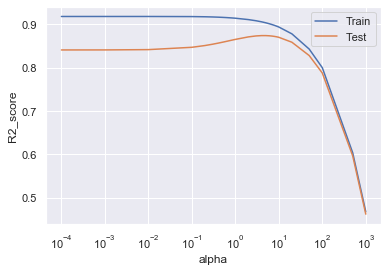

In [125]:
#plotting R2 score vs alpha value
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [128]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.89
test R2 score is 0.87


In [129]:
alpha=100
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred= ridge.predict(X_train)
y_test_pred= ridge.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.81
test R2 score is 0.79


In [130]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
print(ridge.coef_)

[-2.45116147e-02  9.79998637e-03  2.49408716e-02 -8.10661744e-03
  9.92180774e-02  5.10684123e-02  1.92946432e-02  2.57798987e-02
  3.74675666e-02  3.19738257e-02  2.50176942e-02  1.86905756e-02
  1.97699834e-02  3.09039185e-02  1.98970139e-02  5.38850345e-02
  8.13008425e-02  2.73362128e-02  6.31267116e-02  2.95046859e-02
  3.84413884e-02  3.13688381e-02  2.51254274e-02  2.78082809e-02
  4.90280501e-03  1.42104943e-02  7.40461249e-02  2.45867885e-02
  3.27196385e-02 -2.57409073e-02  3.49275644e-03  2.49674237e-03
 -1.67292365e-02  1.55731449e-02 -1.66077341e-02 -2.39271416e-03
 -2.44890949e-03 -2.71651931e-03 -1.58504723e-03 -5.94735170e-04
  9.97090948e-03 -5.08289191e-03  3.42562316e-02 -2.59763830e-02
 -1.87544737e-02 -2.71534233e-02 -2.57515277e-02 -7.53835919e-03
 -3.87385224e-03  5.92394390e-03 -5.97538532e-03  2.72590504e-02
  2.83436630e-02 -1.73438947e-02 -7.67050470e-03 -1.47584751e-02
 -3.36747107e-03  8.66389170e-03  3.49186153e-02  5.34224131e-03
  1.91564689e-02  1.15236

In [131]:
lasso=Lasso()
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
folds=5
lasso_model_cv=GridSearchCV(estimator=lasso,
                           param_grid=params,
                           scoring='r2',
                            cv=folds,
                            return_train_score=True,
                           verbose=1)
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 100, 500, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [132]:
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)

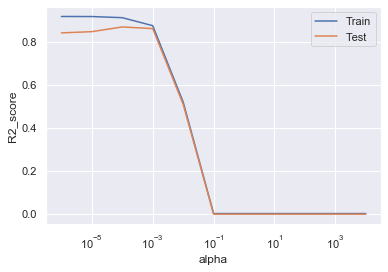

In [133]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [134]:
alph= 0.0001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.91
test R2 score is 0.89


In [135]:
alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
y_train_pred= lasso.predict(X_train)
y_test_pred= lasso.predict(X_test)
print('train R2 score is',round(r2_score(y_train,y_train_pred),2))
print('test R2 score is',round(r2_score(y_test,y_test_pred),2))

train R2 score is 0.87
test R2 score is 0.86


In [136]:
alph= 0.001
lasso= Lasso(alpha=alph)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.02415073  0.          0.         -0.          0.20375112  0.03467534
  0.          0.00945217  0.0287095   0.02797708  0.02678332  0.
  0.          0.          0.00960335  0.          0.27023138  0.01688812
  0.03426767  0.01110593  0.          0.02479407  0.0016921   0.03871498
  0.          0.0135689   0.10618492  0.          0.         -0.02422399
  0.         -0.         -0.03248512  0.0071445  -0.         -0.
 -0.         -0.         -0.          0.          0.         -0.
  0.00747674 -0.01079026 -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.00486233 -0.
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.         -0.         -0.
 -0.01099961 -0.          0.         -0.          0.         -0.
 -0.          0.00974514 -0.          0.         -0.          0.
  0.          0.          0.         -0.         -0.      

In [137]:
#get dictionary containing all the variables and coefficients after lasso regression
lasso_dict=dict(zip(X_train.columns,lasso.coef_))

In [138]:
#filter dictionary for only non-zero coefficients
final_dict={}
for i in lasso_dict:
    if lasso_dict[i]!=0:
        final_dict[i]= round(lasso_dict[i],3)    #rounding coefficient to 3 significant digits
final_dict

{'MSSubClass': -0.024,
 'OverallQual': 0.204,
 'OverallCond': 0.035,
 'ExterQual': 0.009,
 'BsmtQual': 0.029,
 'BsmtExposure': 0.028,
 'BsmtFinType1': 0.027,
 'HeatingQC': 0.01,
 'GrLivArea': 0.27,
 'BsmtFullBath': 0.017,
 'FullBath': 0.034,
 'HalfBath': 0.011,
 'KitchenQual': 0.025,
 'Fireplaces': 0.002,
 'FireplaceQu': 0.039,
 'GarageFinish': 0.014,
 'GarageCars': 0.106,
 'house_age2': -0.024,
 'MSZoning_RM': -0.032,
 'LotConfig_CulDSac': 0.007,
 'Neighborhood_Crawfor': 0.007,
 'Neighborhood_Edwards': -0.011,
 'Neighborhood_NridgHt': 0.005,
 'RoofStyle_Gable': -0.011,
 'Exterior1st_BrkFace': 0.01,
 'MasVnrType_None': -0.003,
 'Foundation_PConc': 0.015,
 'GarageType_Detchd': -0.007,
 'SaleCondition_Partial': 0.006}

In [139]:
len(final_dict)

29

In [140]:
#sorting the coefficient dictionary
import operator
final_dict= dict(sorted(final_dict.items(), key=operator.itemgetter(1), reverse=True))

In [141]:
#printing the final model equation
a= ' + '.join(([str(b)+' X '+str(a) for a,b in final_dict.items()]))
print("Sales Price = {0}+ [ {1} ]".format(round(lasso.intercept_,3),a))

Sales Price = 0.174+ [ 0.27 X GrLivArea + 0.204 X OverallQual + 0.106 X GarageCars + 0.039 X FireplaceQu + 0.035 X OverallCond + 0.034 X FullBath + 0.029 X BsmtQual + 0.028 X BsmtExposure + 0.027 X BsmtFinType1 + 0.025 X KitchenQual + 0.017 X BsmtFullBath + 0.015 X Foundation_PConc + 0.014 X GarageFinish + 0.011 X HalfBath + 0.01 X HeatingQC + 0.01 X Exterior1st_BrkFace + 0.009 X ExterQual + 0.007 X LotConfig_CulDSac + 0.007 X Neighborhood_Crawfor + 0.006 X SaleCondition_Partial + 0.005 X Neighborhood_NridgHt + 0.002 X Fireplaces + -0.003 X MasVnrType_None + -0.007 X GarageType_Detchd + -0.011 X Neighborhood_Edwards + -0.011 X RoofStyle_Gable + -0.024 X MSSubClass + -0.024 X house_age2 + -0.032 X MSZoning_RM ]


Text(0.5, 0, 'error')

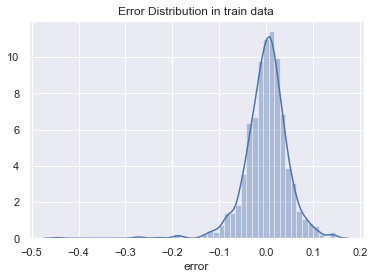

In [142]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Distribution in train data')
plt.xlabel('error')

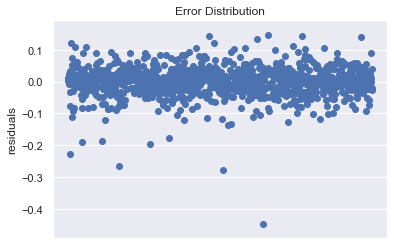

In [143]:
x= [i for i in range (1,y_train.shape[0]+1,1)]
plt.scatter(x,y_train-y_train_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

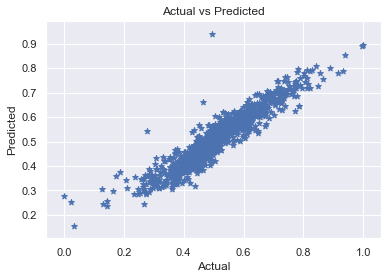

In [144]:
#plt.plot([-4,4],[-4,4], label='actual')
plt.scatter(y_train, y_train_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Text(0.5, 0, 'error')

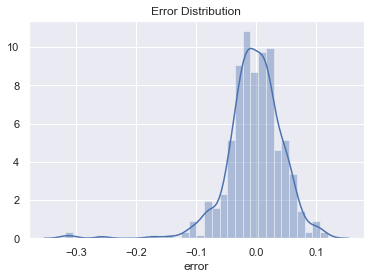

In [145]:
sns.distplot(y_test-y_test_pred)
plt.title('Error Distribution')
plt.xlabel('error')

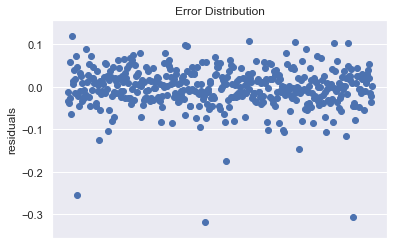

In [146]:
x= [i for i in range (1,439,1)]
plt.scatter(x,y_test-y_test_pred)
plt.title('Error Distribution')
plt.ylabel('residuals')
plt.xticks([])
plt.show()

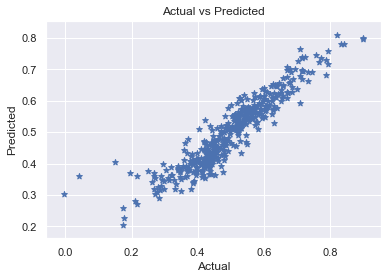

In [147]:
plt.scatter(y_test, y_test_pred, marker='*')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#### The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
Residuals have mean of zero and closely normally distributed.
Residuals do not have any pattern hence it has homoscedasticity.